In [395]:
import numpy as np
import pandas as pd
from biosppy.signals import emg
from biosppy import plotting
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.cluster import KMeans

In [334]:
print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))

TensorFlow version: 1.14.0
Eager execution: False


In [335]:
import fileinput
for lines in fileinput.FileInput("NEWrest.txt", inplace=1): 
    lines = lines.strip()
    if lines == '': continue
    print(lines)

In [336]:
rest = np.loadtxt('NEWrest.txt')

In [337]:
#Calculate RestAvg
restavg = np.average(rest)
restavg

0.09878296584522267

In [338]:
import fileinput
for lines in fileinput.FileInput("Newstrong.txt", inplace=1): 
    lines = lines.strip()
    if lines == '': continue
    print(lines)

In [339]:
forceful = np.loadtxt('NEWstrong.txt')

In [340]:
forceful.size

9251

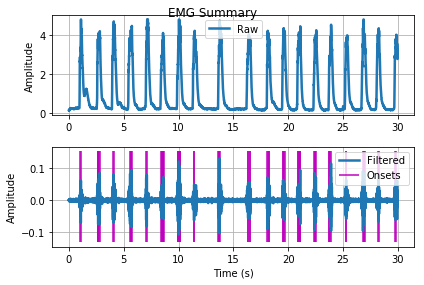

In [341]:
out = emg.emg(signal=forceful, sampling_rate=(forceful.size/30), show=True)

In [342]:
forceful1, forceful2,forceful3, forceful4 = np.split(forceful[0:9248],4)

In [343]:
forceful1.size

2312

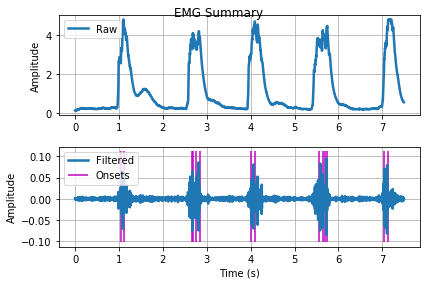

In [344]:
out = emg.emg(signal=forceful1, sampling_rate=(forceful.size/30), show=True)

In [345]:
classvar = np.zeros(len(forceful), dtype=int)
classvar

array([0, 0, 0, ..., 0, 0, 0])

In [346]:
df = pd.DataFrame({'data':forceful, 'class':classvar, 'MAV':classvar, 'MAVS':classvar,'SSI':classvar, 'VAR':classvar,'RMS':classvar, 'WL':classvar, 'Trigger':classvar})


In [347]:
df.loc[12:25,'class'] = 0

In [348]:
df

,data,class,MAV,MAVS,SSI,VAR,RMS,WL,Trigger
0,0.15,0,0,0,0,0,0,0,0
1,0.14,0,0,0,0,0,0,0,0
2,0.14,0,0,0,0,0,0,0,0
3,0.14,0,0,0,0,0,0,0,0
4,0.15,0,0,0,0,0,0,0,0
5,0.15,0,0,0,0,0,0,0,0
6,0.15,0,0,0,0,0,0,0,0
7,0.15,0,0,0,0,0,0,0,0
8,0.14,0,0,0,0,0,0,0,0
9,0.14,0,0,0,0,0,0,0,0


In [349]:
for index, row in df.iterrows():
    if row['data'] > (1.4+restavg):
        df.loc[index, 'class'] = 1

In [350]:
with pd.option_context("display.max_rows", 1000):
    display(df)

,data,class,MAV,MAVS,SSI,VAR,RMS,WL,Trigger
0,0.15,0,0,0,0,0,0,0,0
1,0.14,0,0,0,0,0,0,0,0
2,0.14,0,0,0,0,0,0,0,0
3,0.14,0,0,0,0,0,0,0,0
4,0.15,0,0,0,0,0,0,0,0
5,0.15,0,0,0,0,0,0,0,0
6,0.15,0,0,0,0,0,0,0,0
7,0.15,0,0,0,0,0,0,0,0
8,0.14,0,0,0,0,0,0,0,0
9,0.14,0,0,0,0,0,0,0,0


In [351]:
print(len(df.index))


9251


In [352]:
#Calculate MAV
for index, row in df.iterrows():
    sum = 0
    for index2 in range(50):
        if(index+index2 < len(df.index)):
            sum = sum + df.loc[index+index2, 'data']
    if(index+index2 < len(df.index)):
        df.loc[index+index2, 'MAV'] = sum/50

In [353]:
#Calculate MAVS
for index, row in df.iterrows():
    if(index+1 < len(df.index)):
        mavs = df.loc[index+1, 'MAV'] - df.loc[index, 'MAV']
        df.loc[index, 'MAVS'] = mavs

In [354]:
#Calculate SSI
for index, row in df.iterrows():
    sum = 0
    for index2 in range(50):
        if(index+index2 < len(df.index)):
            sum = sum + abs(df.loc[index+index2, 'data'])**2
    if(index+index2 < len(df.index)):
        df.loc[index+index2, 'SSI'] = sum

In [355]:
#Calculate VAR
for index, row in df.iterrows():
    sum = 0
    for index2 in range(50):
        if(index+index2 < len(df.index)):
            sum = sum + abs(df.loc[index+index2, 'data'])**2
    if(index+index2 < len(df.index)):
        df.loc[index+index2, 'VAR'] = sum/49

In [356]:
#Calculate RMS
for index, row in df.iterrows():
    tmp = df.loc[index, 'SSI']/50
    final = np.sqrt(tmp)
    df.loc[index, 'RMS'] = final

In [357]:
#Calculate WL
for index, row in df.iterrows():
    sum = 0
    for index2 in range(50):
        if(index+index2+1 < len(df.index)):
            sum = sum + abs((df.loc[index+index2, 'data'] + df.loc[index+index2+1, 'data']))
    if(index+index2 < len(df.index)):
        df.loc[index+index2, 'WL'] = sum/50

In [358]:
#Calculate Trigger
for index, row in df.iterrows():
    sum = 0
    for index2 in range(10):
        if(index+index2 < len(df.index)):
            sum = sum + df.loc[index+index2, 'class']
    if(index+index2 < len(df.index)):
        if(sum/10 > .75):
            df.loc[index+index2, 'Trigger'] = 1
        else:
            df.loc[index+index2, 'Trigger'] = 0

In [359]:
#df
with pd.option_context("display.max_rows", 1000):
    display(df)

,data,class,MAV,MAVS,SSI,VAR,RMS,WL,Trigger
0,0.15,0,0.0000,0.000000e+00,0.0000,0.000000,0.000000,0.0000,0
1,0.14,0,0.0000,0.000000e+00,0.0000,0.000000,0.000000,0.0000,0
2,0.14,0,0.0000,0.000000e+00,0.0000,0.000000,0.000000,0.0000,0
3,0.14,0,0.0000,0.000000e+00,0.0000,0.000000,0.000000,0.0000,0
4,0.15,0,0.0000,0.000000e+00,0.0000,0.000000,0.000000,0.0000,0
5,0.15,0,0.0000,0.000000e+00,0.0000,0.000000,0.000000,0.0000,0
6,0.15,0,0.0000,0.000000e+00,0.0000,0.000000,0.000000,0.0000,0
7,0.15,0,0.0000,0.000000e+00,0.0000,0.000000,0.000000,0.0000,0
8,0.14,0,0.0000,0.000000e+00,0.0000,0.000000,0.000000,0.0000,0
9,0.14,0,0.0000,0.000000e+00,0.0000,0.000000,0.000000,0.0000,0


In [360]:
for lines in fileinput.FileInput("NEWsoft.txt", inplace=1): 
    lines = lines.strip()
    if lines == '': continue
    print(lines)
soft = np.loadtxt('NEWsoft.txt')

In [361]:
soft.size

9250

In [362]:
soft1, soft2, soft3, soft4 = np.split(soft[0:9248],4)

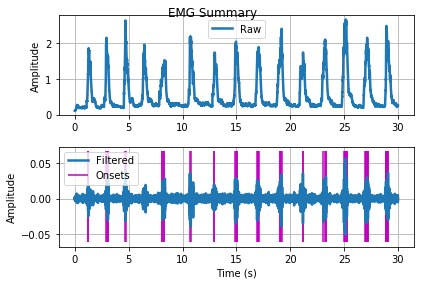

In [363]:
out = emg.emg(signal=soft, sampling_rate=(soft.size/30), show=True)

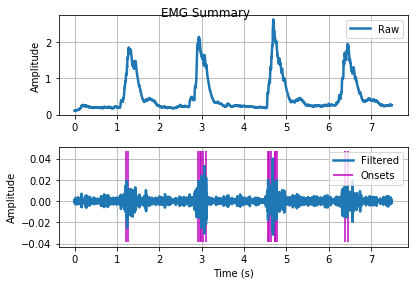

In [364]:
out = emg.emg(signal=soft1, sampling_rate=(soft.size/30), show=True)

In [365]:
classvar = np.zeros(len(soft), dtype=int)
classvar

array([0, 0, 0, ..., 0, 0, 0])

In [366]:
dfs = pd.DataFrame({'data':soft, 'class':classvar, 'MAV':classvar, 'MAVS':classvar,'SSI':classvar, 'VAR':classvar,'RMS':classvar, 'WL':classvar, 'Trigger':classvar})

In [367]:
for index, row in dfs.iterrows():
    if row['data'] > (1.0+restavg):
        dfs.loc[index, 'class'] = 1

In [368]:
#dfs
#with pd.option_context("display.max_rows", 1000):
#    display(dfs)

In [369]:
#Calculate MAV
for index, row in dfs.iterrows():
    sum = 0
    for index2 in range(50):
        if(index+index2 < len(dfs.index)):
            sum = sum + dfs.loc[index+index2, 'data']
    if(index+index2 < len(df.index)):
        dfs.loc[index+index2, 'MAV'] = sum/50

In [370]:
#Calculate MAVS
for index, row in dfs.iterrows():
    if(index+1 < len(dfs.index)):
        mavs = dfs.loc[index+1, 'MAV'] - dfs.loc[index, 'MAV']
        dfs.loc[index, 'MAVS'] = mavs

In [371]:
#Calculate SSI
for index, row in dfs.iterrows():
    sum = 0
    for index2 in range(50):
        if(index+index2 < len(dfs.index)):
            sum = sum + abs(dfs.loc[index+index2, 'data'])**2
    if(index+index2 < len(dfs.index)):
        dfs.loc[index+index2, 'SSI'] = sum

In [372]:
#Calculate VAR
for index, row in dfs.iterrows():
    sum = 0
    for index2 in range(50):
        if(index+index2 < len(dfs.index)):
            sum = sum + abs(dfs.loc[index+index2, 'data'])**2
    if(index+index2 < len(dfs.index)):
        dfs.loc[index+index2, 'VAR'] = sum/49

In [373]:
#Calculate RMS
for index, row in dfs.iterrows():
    tmp = dfs.loc[index, 'SSI']/50
    final = np.sqrt(tmp)
    dfs.loc[index, 'RMS'] = final

In [374]:
#Calculate WL
for index, row in dfs.iterrows():
    sum = 0
    for index2 in range(50):
        if(index+index2+1 < len(dfs.index)):
            sum = sum + abs((dfs.loc[index+index2, 'data'] + dfs.loc[index+index2+1, 'data']))
    if(index+index2 < len(dfs.index)):
        dfs.loc[index+index2, 'WL'] = sum/50

In [375]:
#Calculate Trigger
for index, row in dfs.iterrows():
    sum = 0
    for index2 in range(10):
        if(index+index2 < len(dfs.index)):
            sum = sum + dfs.loc[index+index2, 'class']
    if(index+index2 < len(dfs.index)):
        if(sum/10 > .75):
            dfs.loc[index+index2, 'Trigger'] = 2
        else:
            dfs.loc[index+index2, 'Trigger'] = 0

In [376]:
#dfs
with pd.option_context("display.max_rows", 1000):
    display(dfs)

,data,class,MAV,MAVS,SSI,VAR,RMS,WL,Trigger
0,0.11,0.0,0.0000,0.000000e+00,0.0000,0.000000,0.000000,0.0000,0.0
1,0.12,0.0,0.0000,0.000000e+00,0.0000,0.000000,0.000000,0.0000,0.0
2,0.12,0.0,0.0000,0.000000e+00,0.0000,0.000000,0.000000,0.0000,0.0
3,0.12,0.0,0.0000,0.000000e+00,0.0000,0.000000,0.000000,0.0000,0.0
4,0.11,0.0,0.0000,0.000000e+00,0.0000,0.000000,0.000000,0.0000,0.0
5,0.11,0.0,0.0000,0.000000e+00,0.0000,0.000000,0.000000,0.0000,0.0
6,0.12,0.0,0.0000,0.000000e+00,0.0000,0.000000,0.000000,0.0000,0.0
7,0.12,0.0,0.0000,0.000000e+00,0.0000,0.000000,0.000000,0.0000,0.0
8,0.12,0.0,0.0000,0.000000e+00,0.0000,0.000000,0.000000,0.0000,0.0
9,0.11,0.0,0.0000,0.000000e+00,0.0000,0.000000,0.000000,0.0000,0.0


In [377]:
#df = df.drop(['class'], axis=1)
#dfs = dfs.drop(['class'], axis=1)
df.dtypes

data       float64
class        int64
MAV        float64
MAVS       float64
SSI        float64
VAR        float64
RMS        float64
WL         float64
Trigger      int64
dtype: object

In [378]:
train = df.loc[0:len(df.index)*.75]
len(train)

6939

In [379]:
test = df.loc[len(train.index):len(df.index)]
len(test)

2312

In [380]:
trains = dfs.loc[0:len(dfs.index)*.75]
len(trains)

6939

In [381]:
tests = dfs.loc[len(trains.index):len(dfs.index)]
len(tests)

2312

In [382]:
train = train.append(trains,ignore_index=True)

In [383]:
test = test.append(tests,ignore_index=True)

In [384]:
len(train)

13878

In [385]:
len(test)

4624

In [386]:
target = train.pop('Trigger')

In [387]:
target

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       0.0
13       0.0
14       0.0
15       0.0
16       0.0
17       0.0
18       0.0
19       0.0
20       0.0
21       0.0
22       0.0
23       0.0
24       0.0
25       0.0
26       0.0
27       0.0
28       0.0
29       0.0
        ... 
13848    0.0
13849    0.0
13850    0.0
13851    0.0
13852    0.0
13853    0.0
13854    0.0
13855    0.0
13856    0.0
13857    0.0
13858    0.0
13859    0.0
13860    0.0
13861    0.0
13862    0.0
13863    0.0
13864    0.0
13865    0.0
13866    0.0
13867    0.0
13868    0.0
13869    0.0
13870    0.0
13871    0.0
13872    0.0
13873    0.0
13874    0.0
13875    0.0
13876    0.0
13877    0.0
Name: Trigger, Length: 13878, dtype: float64

In [388]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train, target)

In [389]:
test = test.dropna()
answers = test.pop("Trigger")
test

,data,class,MAV,MAVS,SSI,VAR,RMS,WL
0,3.54,1.0,2.8908,3.920000e-02,449.8790,9.181204,2.999597,5.8208
1,3.43,1.0,2.9300,3.720000e-02,459.4830,9.377204,3.031445,5.8972
2,3.31,1.0,2.9672,3.820000e-02,468.3366,9.557890,3.060512,5.9726
3,3.35,1.0,3.0054,3.800000e-02,477.4855,9.744602,3.090261,6.0488
4,3.38,1.0,3.0434,4.060000e-02,486.7195,9.933051,3.119998,6.1274
5,3.51,1.0,3.0840,3.760000e-02,496.8492,10.139780,3.152298,6.2056
6,3.44,1.0,3.1216,3.300000e-02,506.2492,10.331616,3.181978,6.2762
7,3.36,1.0,3.1546,2.940000e-02,514.6147,10.502341,3.208161,6.3386
8,3.38,1.0,3.1840,2.900000e-02,522.3910,10.661041,3.232309,6.3970
9,3.36,1.0,3.2130,3.280000e-02,530.0325,10.816990,3.255864,6.4588


In [390]:
clf.score(test, answers)

0.983989614885331

In [391]:
predictions = clf.predict(test)
predictions = np.asarray(predictions)
predictions = pd.DataFrame(predictions)

In [392]:
answers = pd.DataFrame(answers)

In [393]:
compare = pd.concat([predictions, answers], axis=1, sort=False)
with pd.option_context("display.max_rows", 4000):
    display(compare)

,0,Trigger
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
5,1.0,1.0
6,1.0,1.0
7,1.0,1.0
8,1.0,1.0
9,1.0,1.0


In [394]:
print(dict(zip(train.columns, clf.feature_importances_)))

{'data': 0.20210423864021054, 'class': 0.6403221856671436, 'MAV': 0.04874577258099081, 'MAVS': 0.009218730995020838, 'SSI': 0.0036692157232611814, 'VAR': 0.06054168460175509, 'RMS': 0.024982529786497582, 'WL': 0.010415642005120343}


In [402]:
from joblib import dump, load
dump(clf, 'expMod.joblib') 
clf2 = load('expMod.joblib') 
clf2.score(test, answers)

0.983989614885331

In [406]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(clf,open(filename, 'wb'))
clf3 = pickle.load()

In [404]:
clf2.predict([[0.20,0.0,.268,.00002,2.89,.059,.2407,.480]])

array([0.])

In [398]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(train)

In [ ]:
kmeans